In [4]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage
import os
import pandas as pd
import imageio
from skimage import io
from skimage.filters import threshold_otsu
from scipy.ndimage import gaussian_filter
import matplotlib
import yaml

font = {'family': 'normal', 'weight' : 'bold', 'size' : 22}
matplotlib.rc('font', **font)

# read parameters

In [5]:
with open("../base/parameters.yml") as file:
    parameters = yaml.load(file, Loader=yaml.FullLoader)
with open("../local/parameters.yml") as file:
    parameters_local = yaml.load(file, Loader=yaml.FullLoader)

# overwrite global parameters with local setting
for key in parameters_local:
    parameters[key] = parameters_local[key]
    
print(parameters)

{'data_folder': '/home/ebauman/Data/zebrafish_xenograft/', 'output_folder': '/home/ebauman/Data/zebrafish_xenograft/'}


# read tiff images

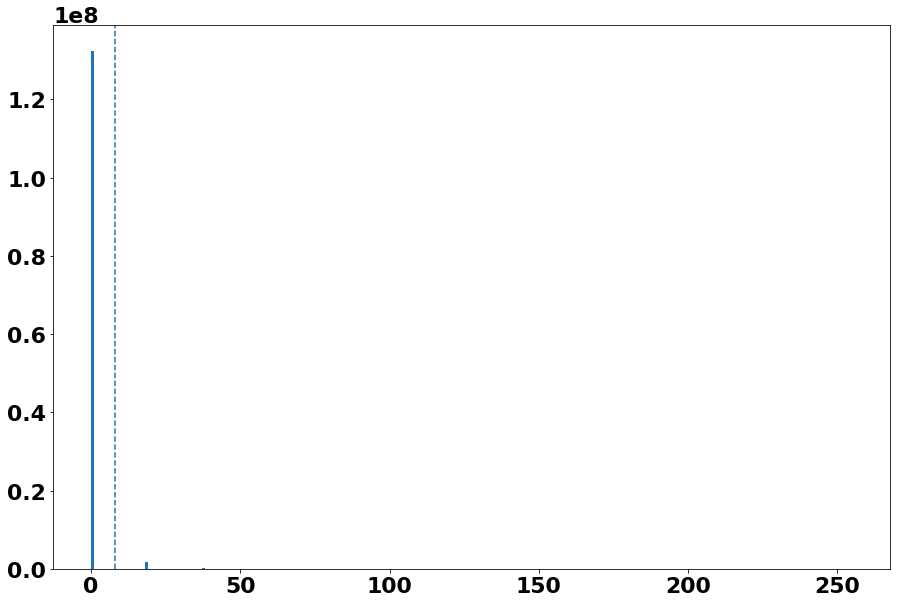

In [13]:
#data_folder = parameters["data_folder"]
data_folder = '/home/ebauman/Data/zebrafish_xenograft/03_Processed_Data/3D/'

#macrophage_file = "/200825/Macrophages-200825-Position-3-movie.tif"
#im_macrophages = np.array(io.imread(data_folder + macrophage_file))
#print(np.max(im_macrophages))
#print(np.min(im_macrophages))
#im_macrophages.shape
#im_macrophages = gaussian_filter(im_macrophages, sigma= 5)

filename = "200804_LBT070_1dpi_Pos001.tif"
filename_short = "200804_Pos001"
im = np.array(io.imread(data_folder + filename))
im_tumor = im[:,:,:,:,0]
im_macrophages = im[:,:,:,:,1]
im_vessel = im[:,:,:,:,2]

fig, ax = plt.subplots(figsize=(15,10))
ax.hist(im_macrophages[0,:,:,:].flatten(),bins=255)
thresh_val_macrophages = 8
ax.axvline(thresh_val_macrophages , linestyle = "dashed")

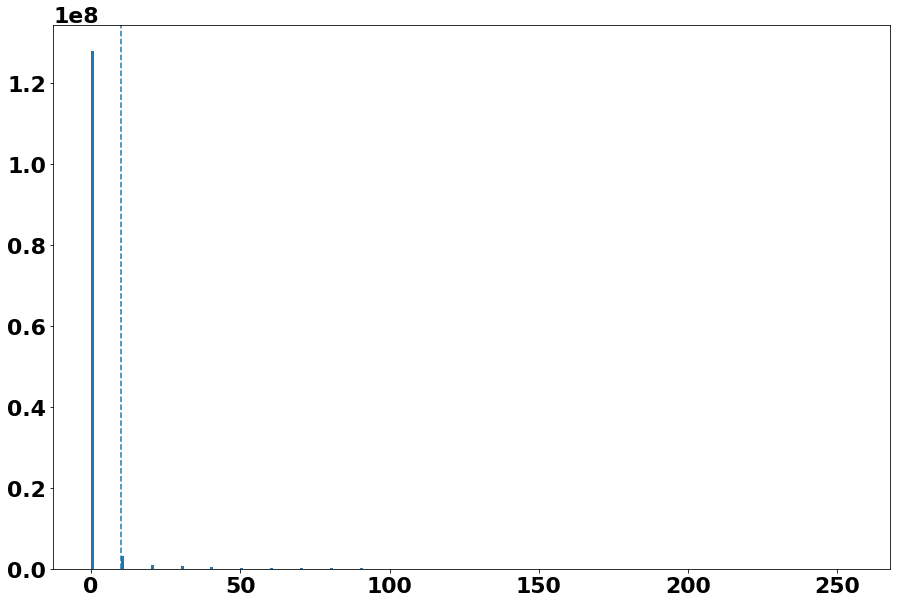

In [7]:
#tumor_file = "/200825/Tumor-200825-Position-3-movie.tif"

#im_tumor = io.imread(data_folder + tumor_file)
#print(np.max(im_tumor))
#print(np.min(im_tumor))
#im_tumor.shape
hist, bins = np.histogram(im_tumor[0,:,:,:])
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(im_tumor[0,:,:,:].flatten(),bins=255)#,bins)
thresh_val_tumor = 10
ax.axvline(thresh_val_tumor , linestyle = "dashed")

In [20]:
im_macrophages = gaussian_filter(im_macrophages, sigma= 5)
mask_macrophages = np.where(np.array(im_macrophages) > thresh_val_macrophages, True, False)

if np.sum(mask_macrophages==True) > np.sum(mask_macrophages==False):
    mask_macrophages = np.where(mask_macrophages, False, True)

In [ ]:
#mask_vessels = np.where(np.array(im_vessel) > thresh_val_vessel, True, False)#

#if np.sum(mask_vessels==True) > np.sum(mask_vessels==False)
#    mask_vessels = np.where(mask_vessels, False, True)

In [12]:
im_tumor = gaussian_filter(im_tumor[10], sigma= 5)
mask_tumor = np.where(np.array(im_tumor) > thresh_val_tumor, True, False)

if np.sum(mask_tumor==True) > np.sum(mask_tumor==False):
    mask_tumor = np.where(mask_tumor, False, True)

In [ ]:
#fig, ax = plt.subplots(figsize=(15,15))
#ax.imshow(mask_vessels[0,62,:,:])

# Calculate distance transform

In [14]:
im_tumor_single_frame = gaussian_filter(im_tumor[10,:,:,:], sigma= 5)
thresh_val = 5
mask_tumor_single_frame = np.where(np.array(im_tumor_single_frame) > thresh_val, True, False)

if np.sum(mask_tumor_single_frame==True) > np.sum(mask_tumor_single_frame==False):
    mask_tumor_single_frame = np.where(mask_tumor_single_frame, False, True)
#fig, ax = plt.subplots(figsize=(15,10))
#ax.hist(im_tumor_single_frame[:,:,:].flatten(),bins=255)#,bins)


In [15]:
tumor_distance = scipy.ndimage.morphology.distance_transform_edt(np.invert(mask_tumor_single_frame[:,:,:]))

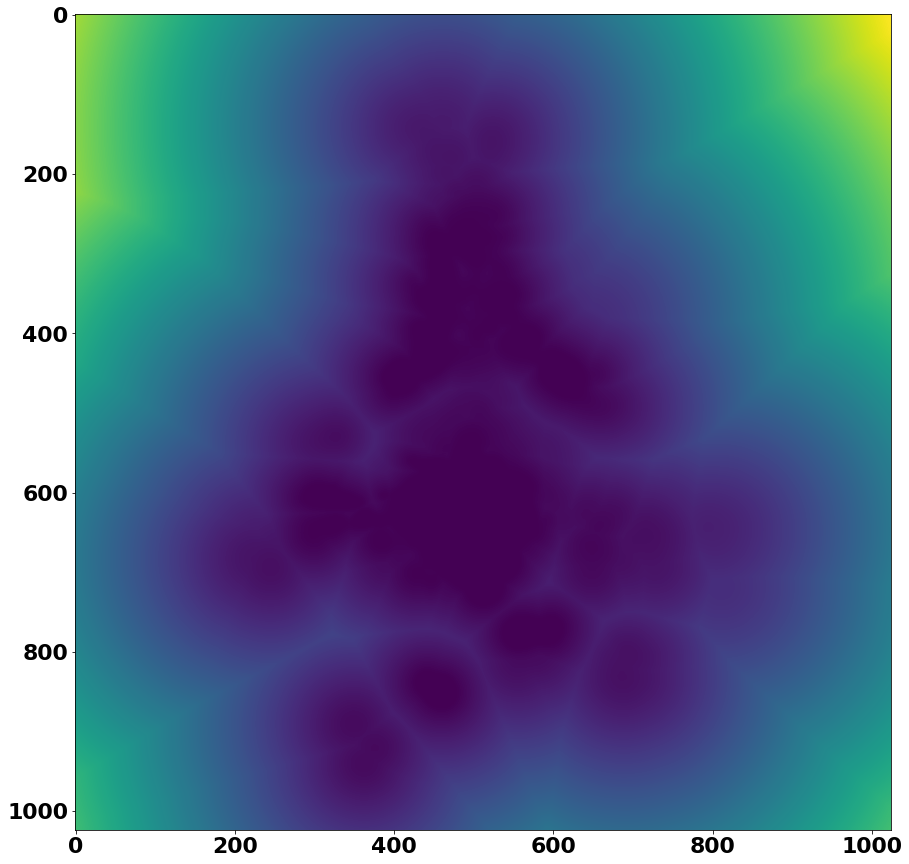

In [16]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(tumor_distance[40,:,:])

In [17]:
distances = []
frame = 31

tumor_single_frame = gaussian_filter(im_tumor[frame,:,:,:], sigma= 5)
thresh_val = 5
mask_tumor_single_frame = np.where(np.array(tumor_single_frame) > thresh_val, True, False)

if np.sum(mask_tumor_single_frame==True) > np.sum(mask_tumor_single_frame==False):
    mask_tumor_single_frame = np.where(mask_tumor_single_frame, False, True)
    


In [18]:
tumor_distances = scipy.ndimage.morphology.distance_transform_edt(np.invert(mask_tumor_single_frame[:,:,:])).flatten()

In [21]:
mean_distance = np.mean(tumor_distances[mask_macrophages[frame,:,:,:].flatten()])
mean_distance

12.82565177439333

In [ ]:
distances = []

for frame in range(im_tumor.shape[0]):
    tumor_single_frame = gaussian_filter(im_tumor[frame,:,:,:], sigma= 5)
    thresh_val = 5
    mask_tumor_single_frame = np.where(np.array(tumor_single_frame) > thresh_val, True, False)
    if np.sum(mask_tumor_single_frame==True) > np.sum(mask_tumor_single_frame==False):
        mask_tumor_single_frame = np.where(mask_tumor_single_frame, False, True)
    
    tumor_distances = scipy.ndimage.morphology.distance_transform_edt(np.invert(mask_tumor_single_frame[:,:,:])).flatten()

    macrophage_single_frame = gaussian_filter(im_macrophages[frame,:,:,:], sigma= 5)
    thresh_val = 5
    mask_macrophage_single_frame = np.where(np.array(macrophage_single_frame) > thresh_val, True, False)
    if np.sum(mask_macrophage_single_frame==True) > np.sum(mask_macrophage_single_frame==False):
        mask_macrophage_single_frame = np.where(mask_macrophage_single_frame, False, True)
    
    
    #mean_distance = np.mean(tumor_distances[mask_macrophages[frame,:,:,:].flatten()])
    mean_distance = np.mean(tumor_distances[mask_macrophage_single_frame.flatten()])
    print("Frame: %s" % frame)
    print(mean_distance)
    distances.append(mean_distance)

Frame: 0
3.128610296315839
Frame: 1
4.024079158743215
Frame: 2
3.4794398006148213
Frame: 3
4.1971417737377035
Frame: 4
2.9962954358880682
Frame: 5
4.266986496376019


/home/ebauman/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ebauman/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Frame: 6
nan
Frame: 7
nan


In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
time = range(1,len(distances )+1)
ax.plot(time, distances , marker='x', color = "black", linestyle = "dashed", linewidth = 2, markersize = 10)# atistics_df["frame"],statistics_df["macrophage_number"], color= "black")
ax.set_ylabel("macrophage to tumor distance")
ax.set_xlabel("time frame")
ax.set_ylim(0,150)
fig.savefig("macrophage-tumor-distance-3D.pdf")
fig.savefig("macrophage-tumor-distance-3D.png")